In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()

In [66]:
xtrain=xtrain/255.0 
xtest=xtest/255.0

In [67]:
xtrain = tf.expand_dims(xtrain, 3)
xtest = tf.expand_dims(xtest, 3)

In [68]:
xtrain.shape
xtest.shape

TensorShape([10000, 28, 28, 1])

In [69]:
ytrain.shape

(60000,)

In [70]:
ytest.shape

(10000,)

In [73]:
#validation split 
val_x = xtrain[:5000]
val_y = ytrain[:5000]

# LeNet5 Architecture

In [74]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=(28,28,1), padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C5
    keras.layers.Flatten(), #Flatten   
    keras.layers.Dense(120, activation='tanh'), #C5 
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])
lenet_5_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_12 (Avera  (None, 14, 14, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_19 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_13 (Avera  (None, 5, 5, 16)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_20 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_6 (Flatten)         (None, 120)              

In [75]:
#compile model
lenet_5_model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [80]:
 #50 epochs
 history=lenet_5_model.fit(xtrain,ytrain,epochs=5,validation_data=(val_x,val_y))

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0189 - accuracy: 0.9940 - val_loss: 0.0127 - val_accuracy: 0.9954
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0177 - accuracy: 0.9942 - val_loss: 0.0128 - val_accuracy: 0.9950
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0146 - accuracy: 0.9955 - val_loss: 0.0171 - val_accuracy: 0.9946
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0147 - accuracy: 0.9950 - val_loss: 0.0118 - val_accuracy: 0.9956
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0137 - accuracy: 0.9952 - val_loss: 0.0083 - val_accuracy: 0.9966


In [81]:
lenet_5_model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0606 - accuracy: 0.9845


[0.060640767216682434, 0.984499990940094]

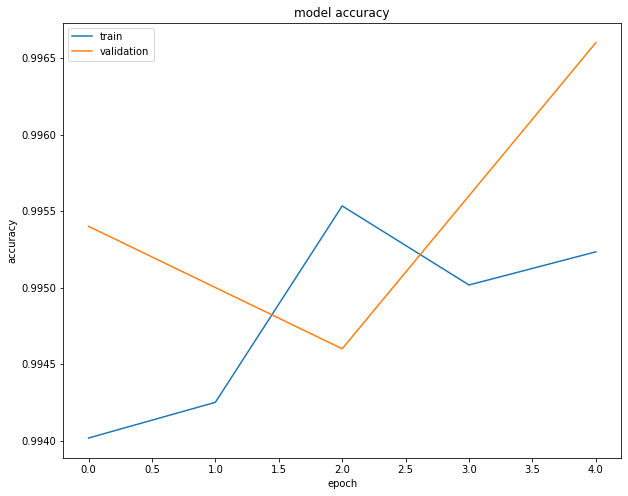

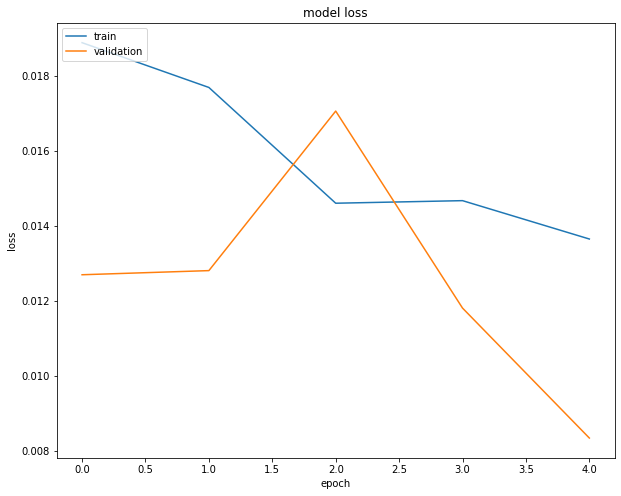

In [82]:
#  "Accuracy Plot"
plt.figure(figsize=(10,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss Plot"
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [83]:
# collect predictions 
predictions =lenet_5_model.predict(xtest)
predictions

array([[2.2326930e-08, 7.4585347e-07, 2.8120380e-07, ..., 9.9998605e-01,
        5.3602931e-09, 7.7452169e-06],
       [7.2353587e-06, 2.6100544e-05, 9.9996388e-01, ..., 3.9746206e-10,
        5.2696345e-07, 8.0106560e-11],
       [2.2642194e-08, 9.9998474e-01, 4.9415586e-08, ..., 1.0122676e-05,
        1.4722663e-07, 1.4289570e-08],
       ...,
       [5.6066707e-10, 2.3285767e-07, 9.9685359e-08, ..., 2.0930629e-06,
        3.5645273e-06, 9.8182209e-06],
       [3.6176965e-07, 9.9666275e-09, 5.8943611e-10, ..., 5.9705720e-09,
        6.9998510e-05, 6.2873609e-09],
       [1.1834024e-06, 1.9904745e-08, 3.2176190e-06, ..., 1.1179033e-09,
        3.6837642e-07, 9.6130508e-09]], dtype=float32)

In [85]:
#model evaluation,confusion matrix and classification report
from sklearn.metrics import accuracy_score,confusion_matrix ,classification_report
predictions = np.argmax(lenet_5_model.predict(xtest),axis=1)
cm=confusion_matrix(ytest,predictions)
print(cm)
print(accuracy_score(ytest,predictions))

[[ 970    1    3    0    0    1    3    1    1    0]
 [   0 1126    3    3    0    0    2    1    0    0]
 [   2    0 1019    4    1    0    1    4    1    0]
 [   0    0    0 1005    0    1    0    2    1    1]
 [   0    0    1    0  977    0    2    0    0    2]
 [   2    0    0    9    0  875    3    1    1    1]
 [   1    3    2    0    1    2  946    0    3    0]
 [   0    3    9    3    0    0    0 1009    0    4]
 [   4    1    5   19    1    2    0    3  937    2]
 [   0    2    1    4   13    2    1    4    1  981]]
0.9845


Text(69.0, 0.5, 'Truth')

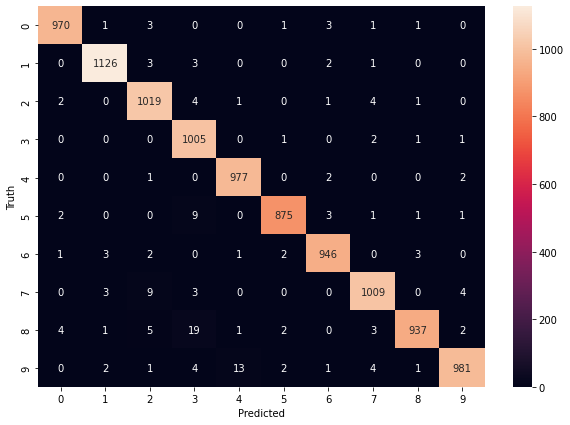

In [87]:
#Confusion Matrix Ploting,See the difference
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [86]:
print(classification_report(predictions,ytest))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       979
           1       0.99      0.99      0.99      1136
           2       0.99      0.98      0.98      1043
           3       1.00      0.96      0.98      1047
           4       0.99      0.98      0.99       993
           5       0.98      0.99      0.99       883
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1025
           8       0.96      0.99      0.98       945
           9       0.97      0.99      0.98       991

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [88]:
#Now with 50 epoches

In [89]:
 #50 epochs
 history=lenet_5_model.fit(xtrain,ytrain,epochs=50,validation_data=(val_x,val_y))

Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0122 - accuracy: 0.9962 - val_loss: 0.0145 - val_accuracy: 0.9960
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0138 - accuracy: 0.9955 - val_loss: 0.0084 - val_accuracy: 0.9968
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0113 - accuracy: 0.9966 - val_loss: 0.0055 - val_accuracy: 0.9982
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0131 - accuracy: 0.9955 - val_loss: 0.0043 - val_accuracy: 0.9992
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0105 - accuracy: 0.9967 - val_loss: 0.0069 - val_accuracy: 0.9974
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0103 - accuracy: 0.9964 - val_loss: 0.0062 - val_accuracy: 0.9978
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0095 - accuracy: 0.9968 - val_loss: 0.0131 - val_accuracy:

In [90]:
lenet_5_model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 4ms/step - loss: 0.0734 - accuracy: 0.9854


[0.07336283475160599, 0.9854000210762024]

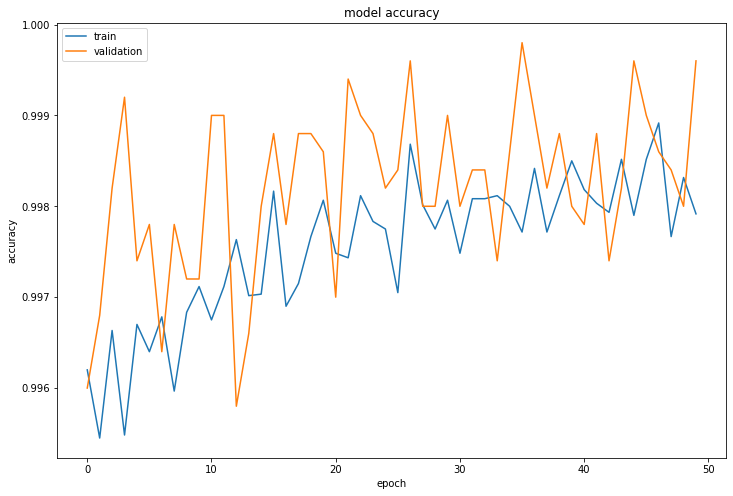

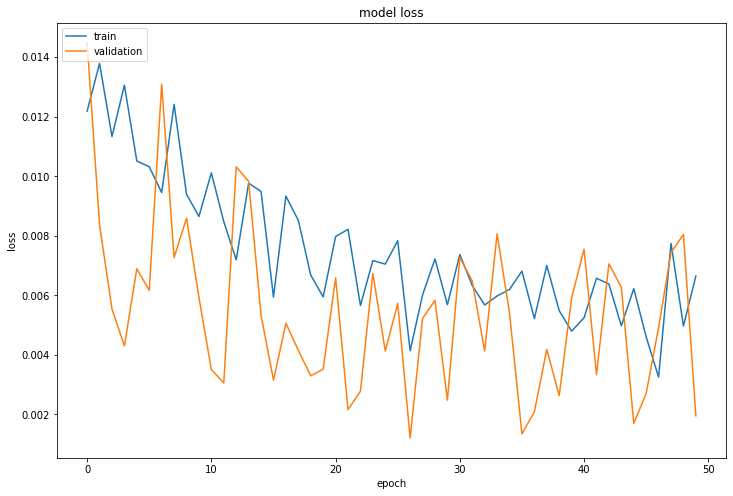

In [94]:
#  "Accuracy Plot"
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss Plot"
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [95]:
# collect predictions 
predictions =lenet_5_model.predict(xtest)
predictions

array([[2.3541791e-10, 1.2008707e-10, 3.9067740e-09, ..., 9.9999988e-01,
        1.4602579e-10, 1.2735733e-08],
       [7.6230848e-11, 3.4817219e-07, 9.9999964e-01, ..., 1.6577994e-11,
        1.3843621e-10, 2.9372907e-15],
       [1.9352399e-10, 1.0000000e+00, 1.9968233e-10, ..., 1.3763123e-09,
        1.1531922e-08, 5.9545289e-13],
       ...,
       [9.3193092e-12, 3.0716496e-10, 6.3732089e-11, ..., 2.3737081e-07,
        9.6903825e-08, 6.6299062e-06],
       [2.1543177e-11, 1.9043970e-12, 2.2668845e-14, ..., 7.1210412e-14,
        1.1674957e-06, 2.2286708e-12],
       [2.9529390e-06, 4.9388788e-10, 1.4915815e-07, ..., 1.3783498e-11,
        4.1000291e-07, 9.4345454e-10]], dtype=float32)

In [96]:
#model evaluation,confusion matrix and classification report
from sklearn.metrics import accuracy_score,confusion_matrix ,classification_report
predictions = np.argmax(lenet_5_model.predict(xtest),axis=1)
cm=confusion_matrix(ytest,predictions)
print(cm)
print(accuracy_score(ytest,predictions))

[[ 977    0    0    0    0    0    0    1    2    0]
 [   0 1132    1    0    0    0    1    1    0    0]
 [   5    1 1002    6    1    0    1    6   10    0]
 [   0    0    2  994    0    5    0    2    5    2]
 [   0    0    1    0  974    0    3    0    0    4]
 [   2    0    0    5    0  881    1    1    1    1]
 [   4    3    0    0    9    1  938    0    2    1]
 [   0    2    3    4    1    0    0 1010    1    7]
 [   2    1    2    4    0    2    0    0  961    2]
 [   0    2    0    1   10    5    0    3    3  985]]
0.9854


Text(69.0, 0.5, 'Truth')

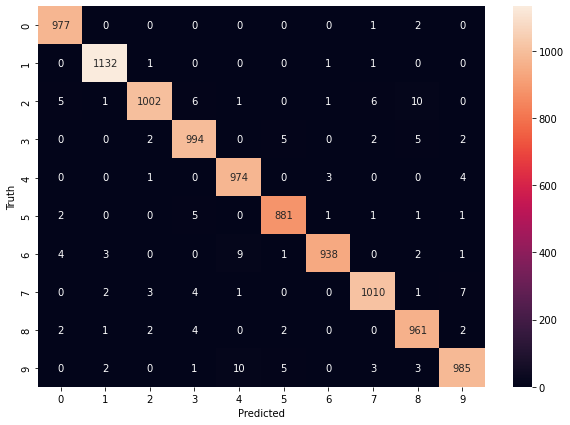

In [97]:
#Confusion Matrix Ploting,See the difference
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [98]:
print(classification_report(predictions,ytest))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       990
           1       1.00      0.99      0.99      1141
           2       0.97      0.99      0.98      1011
           3       0.98      0.98      0.98      1014
           4       0.99      0.98      0.99       995
           5       0.99      0.99      0.99       894
           6       0.98      0.99      0.99       944
           7       0.98      0.99      0.98      1024
           8       0.99      0.98      0.98       985
           9       0.98      0.98      0.98      1002

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

